# A Gentle Introduction to Autocorrelation and Partial Autocorrelation

Autocorrelation and partial autocorrelation plots are heavily used in time series analysis and forecasting.

These are plots that graphically summarize the strength of a relationship with an observation in a time series with observations at prior time steps. The difference between autocorrelation and partial autocorrelation can be difficult and confusing for beginners to time series forecasting.

In this tutorial, you will discover how to calculate and plot autocorrelation and partial correlation plots with Python. 

After completing this tutorial, you will know:

1. How to plot and review the autocorrelation function for a time series.
2. How to plot and review the partial autocorrelation function for a time series.
3. The difference between autocorrelation and partial autocorrelation functions for time series analysis.

Let’s get started.

## Minimum Daily Temperatures Dataset

This dataset describes the minimum daily temperatures over 10 years (1981-1990) in the city Melbourne, Australia.

The units are in degrees Celsius and there are 3,650 observations. The source of the data is credited as the Australian Bureau of Meteorology.

Learn more and download the dataset from Dara Market. <a href="https://datamarket.com/data/set/2328/daily-rainfall-in-melbourne-australia-1981-1990#!ds=2328&display=line"> LINK </a>. The dataset has already been saved in the /data folder with filename: “daily-minimum-temperatures.csv”.   


The example below will load the Minimum Daily Temperatures and graph the time series.

Note: The file contains some question mark ("?") characters that must be removed before you can use the dataset.  Also remove any footer information in the file.

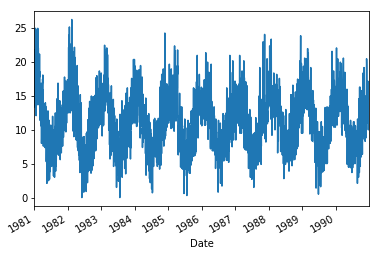

In [32]:
from pandas import Series
from matplotlib import pyplot
series = Series.from_csv('data/daily-minimum-temperatures.csv', header=0)

series=series.astype(float)
series.plot()
pyplot.show()

Running the example loads the dataset as a Pandas Series and creates a line plot of the time series.

## Correlation and Autocorrelation

Statistical correlation summarizes the strength of the relationship between two variables.

We can assume the distribution of each variable fits a Gaussian (bell curve) distribution. If this is the case, we can use the Pearson’s correlation coefficient to summarize the correlation between the variables.

The Pearson’s correlation coefficient is a number between -1 and 1 that describes a negative or positive correlation respectively. A value of zero indicates no correlation.

We can calculate the correlation for time series observations with observations with previous time steps, called lags. Because the correlation of the time series observations is calculated with values of the same series at previous times, this is called a serial correlation, or an autocorrelation.

A plot of the autocorrelation of a time series by lag is called the AutoCorrelation Function, or the acronym ACF. This plot is sometimes called a correlogram or an autocorrelation plot.

Below is an example of calculating and plotting the autocorrelation plot for the Minimum Daily Temperatures using the plot_acf() function from the statsmodels library.

This requires that we install the 'statsmodel' library to utilize these functions. Alternatively, we can write our own functions. To do the install, we added the statement "!pip install statsmodels". 


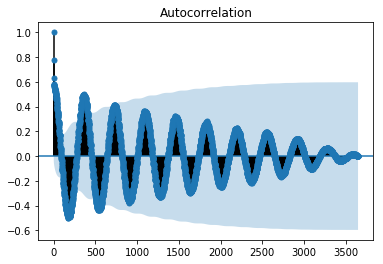

In [33]:
!pip install statsmodels

from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf

series = Series.from_csv('data/daily-minimum-temperatures.csv', header=0)
plot_acf(series)
pyplot.show()

# Running the example creates a 2D plot showing the lag value along the 
# x-axis and the correlation on the y-axis between -1 and 1.

# Confidence intervals are drawn as a cone. By default, this is set to a 
# 95% confidence interval, suggesting that correlation values outside of 
# this code are very likely a correlation and not a statistical fluke.

By default, all lag values are printed, which makes the plot noisy.

We can limit the number of lags on the x-axis to 50 to make the plot easier to read.

## Partial Autocorrelation Function

A partial autocorrelation is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed.

> The partial autocorrelation at lag k is the correlation that results after removing the effect of any correlations due to the terms at shorter lags.

> — Page 81, Section 4.5.6 Partial Autocorrelations, Introductory Time Series with R.

The autocorrelation for an observation and an observation at a prior time step is comprised of both the direct correlation and indirect correlations. These indirect correlations are a linear function of the correlation of the observation, with observations at intervening time steps.

It is these indirect correlations that the partial autocorrelation function seeks to remove. Without going into the math, this is the intuition for the partial autocorrelation.

The example below calculates and plots a partial autocorrelation function for the first 50 lags in the Minimum Daily Temperatures dataset using the plot_pacf() from the statsmodels library.

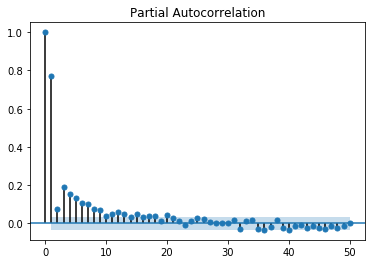

In [34]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_pacf

series = Series.from_csv('data/daily-minimum-temperatures.csv', header=0)
plot_pacf(series, lags=50)
pyplot.show()

## Intuition for ACF and PACF Plots

Plots of the autocorrelation function and the partial autocorrelation function for a time series tell a very different story.

We can use the intuition for ACF and PACF above to explore some thought experiments.

### Autoregression Intuition

Consider a time series that was generated by an autoregression (AR) process with a lag of k.

We know that the ACF describes the autocorrelation between an observation and another observation at a prior time step that includes direct and indirect dependence information.

This means we would expect the ACF for the AR(k) time series to be strong to a lag of k and the inertia of that relationship would carry on to subsequent lag values, trailing off at some point as the effect was weakened.

We know that the PACF only describes the direct relationship between an observation and its lag. This would suggest that there would be no correlation for lag values beyond k.

This is exactly the expectation of the ACF and PACF plots for an AR(k) process.

### Moving Average Intuition

Consider a time series that was generated by a moving average (MA) process with a lag of k.

Remember that the moving average process is an autoregression model of the time series of residual errors from prior predictions. Another way to think about the moving average model is that it corrects future forecasts based on errors made on recent forecasts.

We would expect the ACF for the MA(k) process to show a strong correlation with recent values up to the lag of k, then a sharp decline to low or no correlation. By definition, this is how the process was generated.

For the PACF, we would expect the plot to show a strong relationship to the lag and a trailing off of correlation from the lag onwards.

Again, this is exactly the expectation of the ACF and PACF plots for an MA(k) process.

